# Week 5 Assignment :-


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Importing Dataset

In [2]:
data=pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### The last 10 values of a data set

In [3]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Description of dataset

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
for i in data.columns:
    print(i,len(data[i].unique()))

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2


##  Univariate  and Bivariate analysis of data

## Bivariate analysis
### we are going to plot a bar chart with  two variable

Text(0.5, 1.0, 'Age vs Outcome')

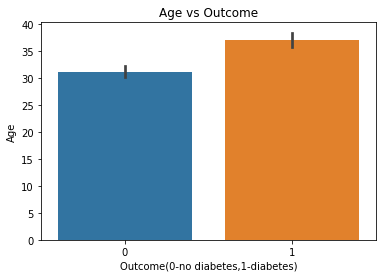

In [8]:
sns.barplot('Outcome','Age',data=data)
plt.xlabel('Outcome(0-no diabetes,1-diabetes)')
plt.title('Age vs Outcome')


## univariate analysis
### we are going to plot a pie chart with single variable

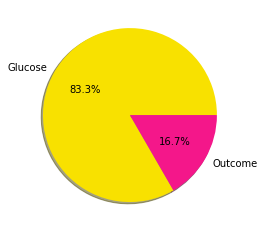

In [9]:
a,b=np.unique(data.Glucose.values,return_counts=True)
colors = ['#f8e100','#f4178a']
labels=['Glucose','Outcome']
plt.pie([b[0],b[1]],colors=colors,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()
        

## Checking missing values in data set

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.Outcome.unique()

array([1, 0], dtype=int64)

## Removing columns those contains null values

In [12]:
data.drop('Outcome',axis=1,inplace=True)
data.shape

(768, 8)

## Data Formatting

## replacing zero values with mean of attributes ,There are zero values in a Glucose,Blood Pressure,SkinThickness and BMI

In [13]:
data.Glucose.replace(0,np.nan,inplace=True)
data.Glucose.replace(np.nan,data['Glucose'].mean(),inplace=True)
data.BloodPressure.replace(0,np.nan,inplace=True)
data.BloodPressure.replace(np.nan,data['BloodPressure'].mean(),inplace=True)
data.SkinThickness.replace(0,np.nan,inplace=True)
data.SkinThickness.replace(np.nan,data['SkinThickness'].mean(),inplace=True)
data.Insulin.replace(0,np.nan,inplace=True)
data.Insulin.replace(np.nan,data['Insulin'].mean(),inplace=True)
data.BMI.replace(0,np.nan,inplace=True)
data.BMI.replace(np.nan,data['BMI'].mean(),inplace=True)

In [14]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54


In [15]:
correlation=data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000


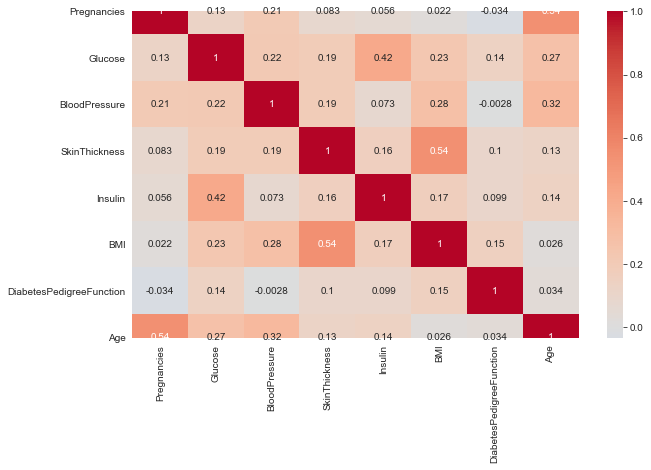

In [43]:
plt.subplots(figsize=(10,6))
sns.heatmap(correlation,center=0,cmap="coolwarm",annot=True)

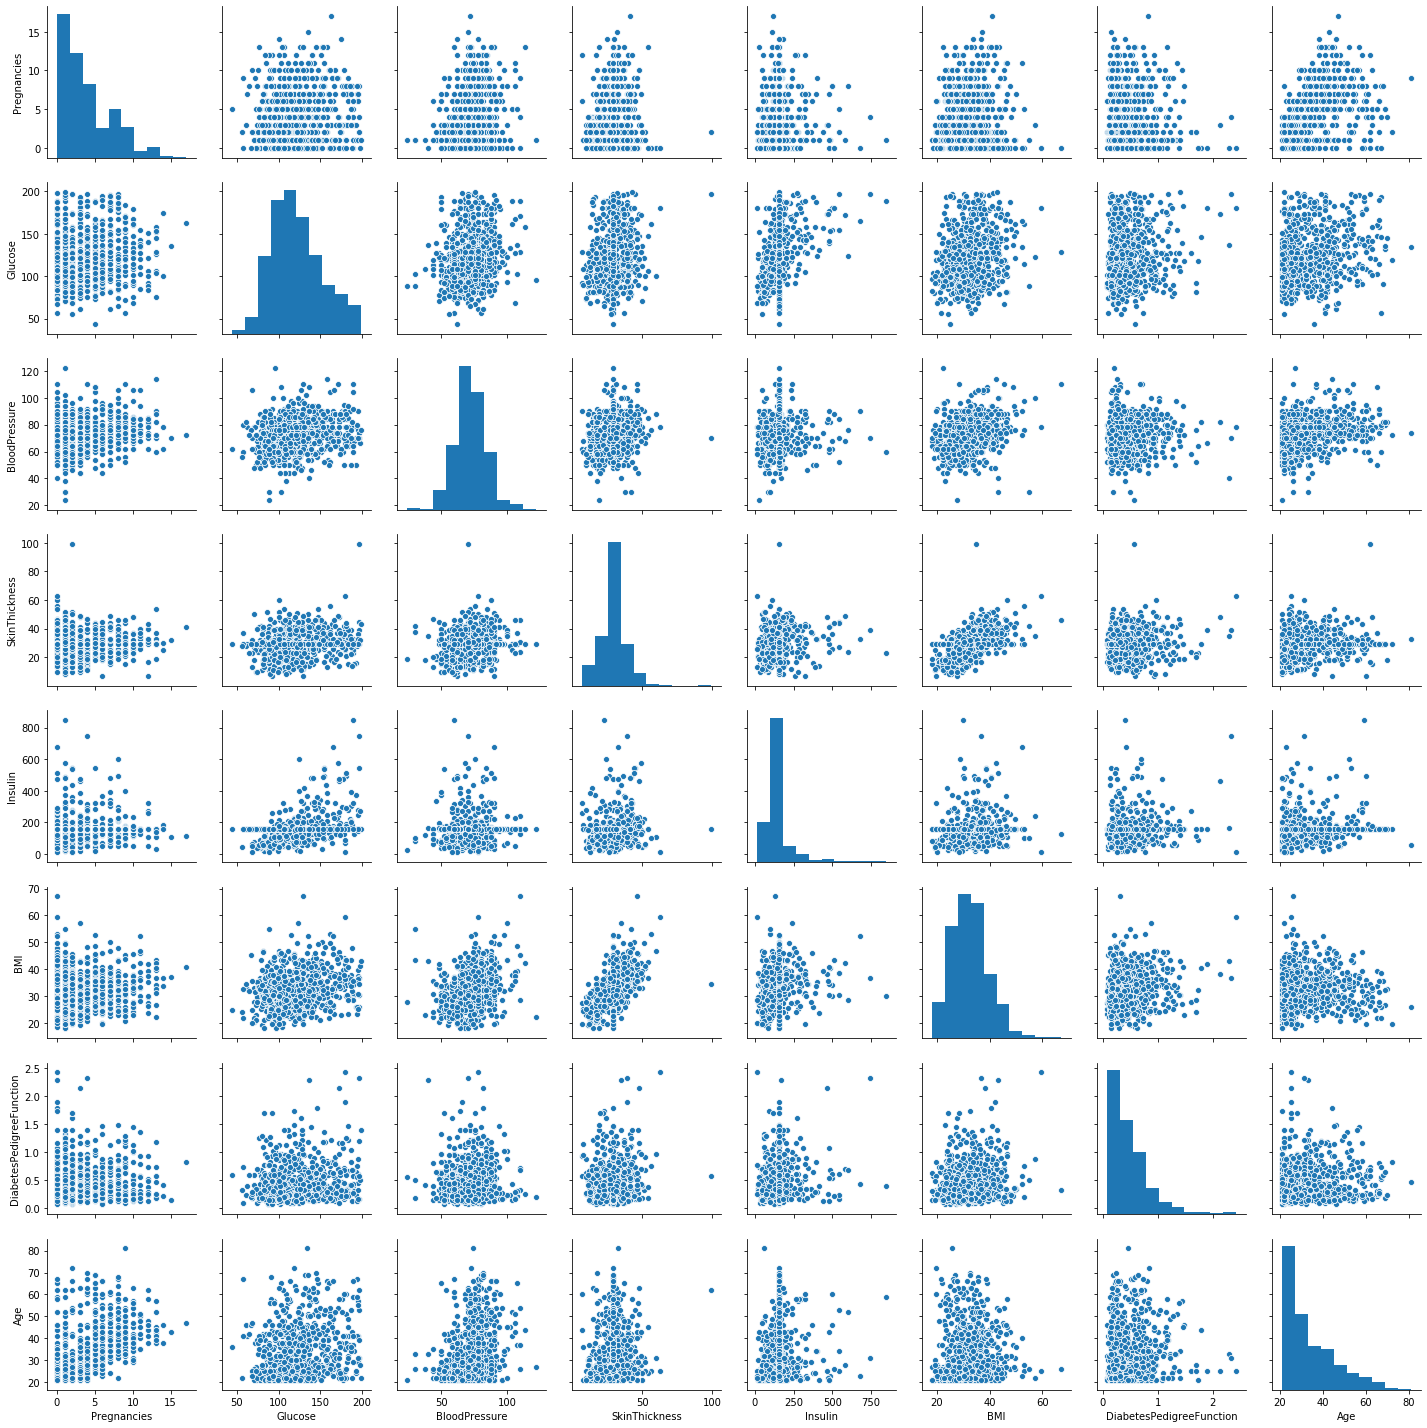

In [17]:
sns.pairplot(data)

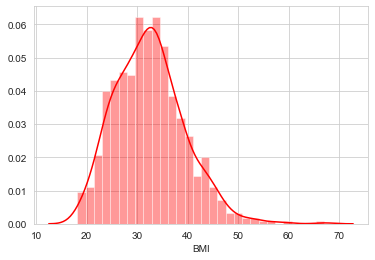

In [18]:
sns.set_style('whitegrid')
sns.distplot(data['BMI'],color='r',rug=False,bins=30)